## Generate the interactome hierarchy

This notebook documents the generation of the interactome hierarchy shown in Figure 5A. It uses the Paris algorithm to generate the hierarchical clustering, then generates a dendrogram and updates the hierarchical clustering ids in the cluster table.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sknetwork as skn
import sys

from IPython.display import SVG
from sknetwork.hierarchy import Paris, cut_straight
from sknetwork.visualization import svg_dendrogram

sys.path.append('../../scripts/interactome_paris_clustering')
import paris_clustering as pc

In [ ]:
# import files necessary to compute hierarchical clustering
root = '../../data/ppi_analysis/'

# precomputed interactome communities
clusters = pd.read_csv(root + 'clustering/overview_clusters_20210212.csv')

# OpenCell interactions
edges = pd.read_csv(root + 'clustering/oc_interactions_stoich_weighted.csv', index_col=0)

In [ ]:
# calculate an edge list consisting of number of interactions between each community
intercluster_counts = pc.calculate_intercluster_edges(clusters, edges)

# Create a networkX sparse matrix from the edge list
c_graph = nx.convert_matrix.from_pandas_edgelist(
    intercluster_counts, 'cluster_1', 'cluster_2', edge_attr='intersection'
)
nodes = list(c_graph.nodes())
mat = nx.to_scipy_sparse_matrix(c_graph, weight='intersection')

# initiate Paris hierarchical clustering and generate a dendrogram
paris = Paris()
dendrogram = paris.fit_transform(mat)

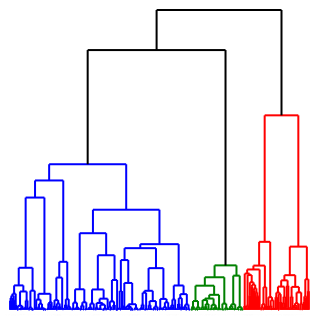

In [27]:
# generate a SVG file of the dendrogram
image = svg_dendrogram(
    dendrogram, nodes, n_clusters=3, rotate= False, height=300, width=300, font_size=0.1
)
SVG(image)

In [37]:
# update the clustering table to include branches (3 clusters) and modules (20 clusters)
branches = cut_straight(dendrogram, n_clusters=3)
branch_dict = dict(zip(nodes, branches))

modules = cut_straight(dendrogram, n_clusters=20)
module_dict = dict(zip(nodes, modules))

# update the cluster table
clusters['branch'] = clusters['community'].apply(lambda x: branch_dict[x])
clusters['module'] = clusters['community'].apply(lambda x: module_dict[x])

In [38]:
# finalized table including hierarchical membership
clusters

,gene_names,community,core_complex,branch,module
0,ATG4B,1,0.0,1,7
1,ATG7,1,0.0,1,7
2,CAPRIN1,1,0.0,1,7
3,CCDC124,1,0.0,1,7
4,DLG1,1,0.0,1,7
...,...,...,...,...,...
2091,ANXA11,299,NaN,0,11
2092,PRDX3,299,NaN,0,11
2093,AGAP1,300,NaN,0,2
2094,AGAP3,300,NaN,0,2
